In [1]:
import warnings
import pandas as pd
import arviz as az

import os, sys
dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path: sys.path.append(dir1)
import calendar
from libs.model import HGPforecaster
from libs.metrics import calculate_metrics, metrics_to_table
from libs.pre_processing import generate_groups_data
from libs.visual_analysis import visualize_fit, visualize_predict
az.style.use('arviz-darkgrid')
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../data/TourismData_v3.csv')
data['Year'] = data['Year'].fillna(method='ffill')

d = dict((v,k) for k,v in enumerate(calendar.month_name))
data.Month = data.Month.map(d)
data = data.assign(t=pd.to_datetime(data[['Year', 'Month']].assign(day=1))).set_index('t')
data = data.drop(['Year', 'Month'], axis=1)
data = data.round()

In [3]:
groups_input = {
    'state': [0,1],
    'zone': [0,2],
    'region': [0,3],
    'purpose': [3,6]
}

In [4]:
data_ = data.reset_index().melt(id_vars=["t"], 
        var_name="Groups", 
        value_name="Count")

In [5]:
# Select top 50 columns
top50 = data_.groupby('Groups').sum()['Count'].reset_index().sort_values(by=['Count'], ascending=False)[0:50]['Groups'].unique()
data = data.loc[:, data.columns.isin(top50)]

In [6]:
groups = generate_groups_data(data, groups_input, seasonality=12, h=12)

Number of groups: 4
	state: 6
	zone: 18
	region: 29
	purpose: 4
Total number of series: 50
Number of points per series for train: 216
Total number of points: 228
Seasonality: 12
Forecast horizon: 12


In [7]:
m = HGPforecaster(groups_data=groups, 
                  levels=['state','purpose']
                 )
m.fit()

Fitting model...



Sampling...


In [8]:
m.predict()

Sampling...


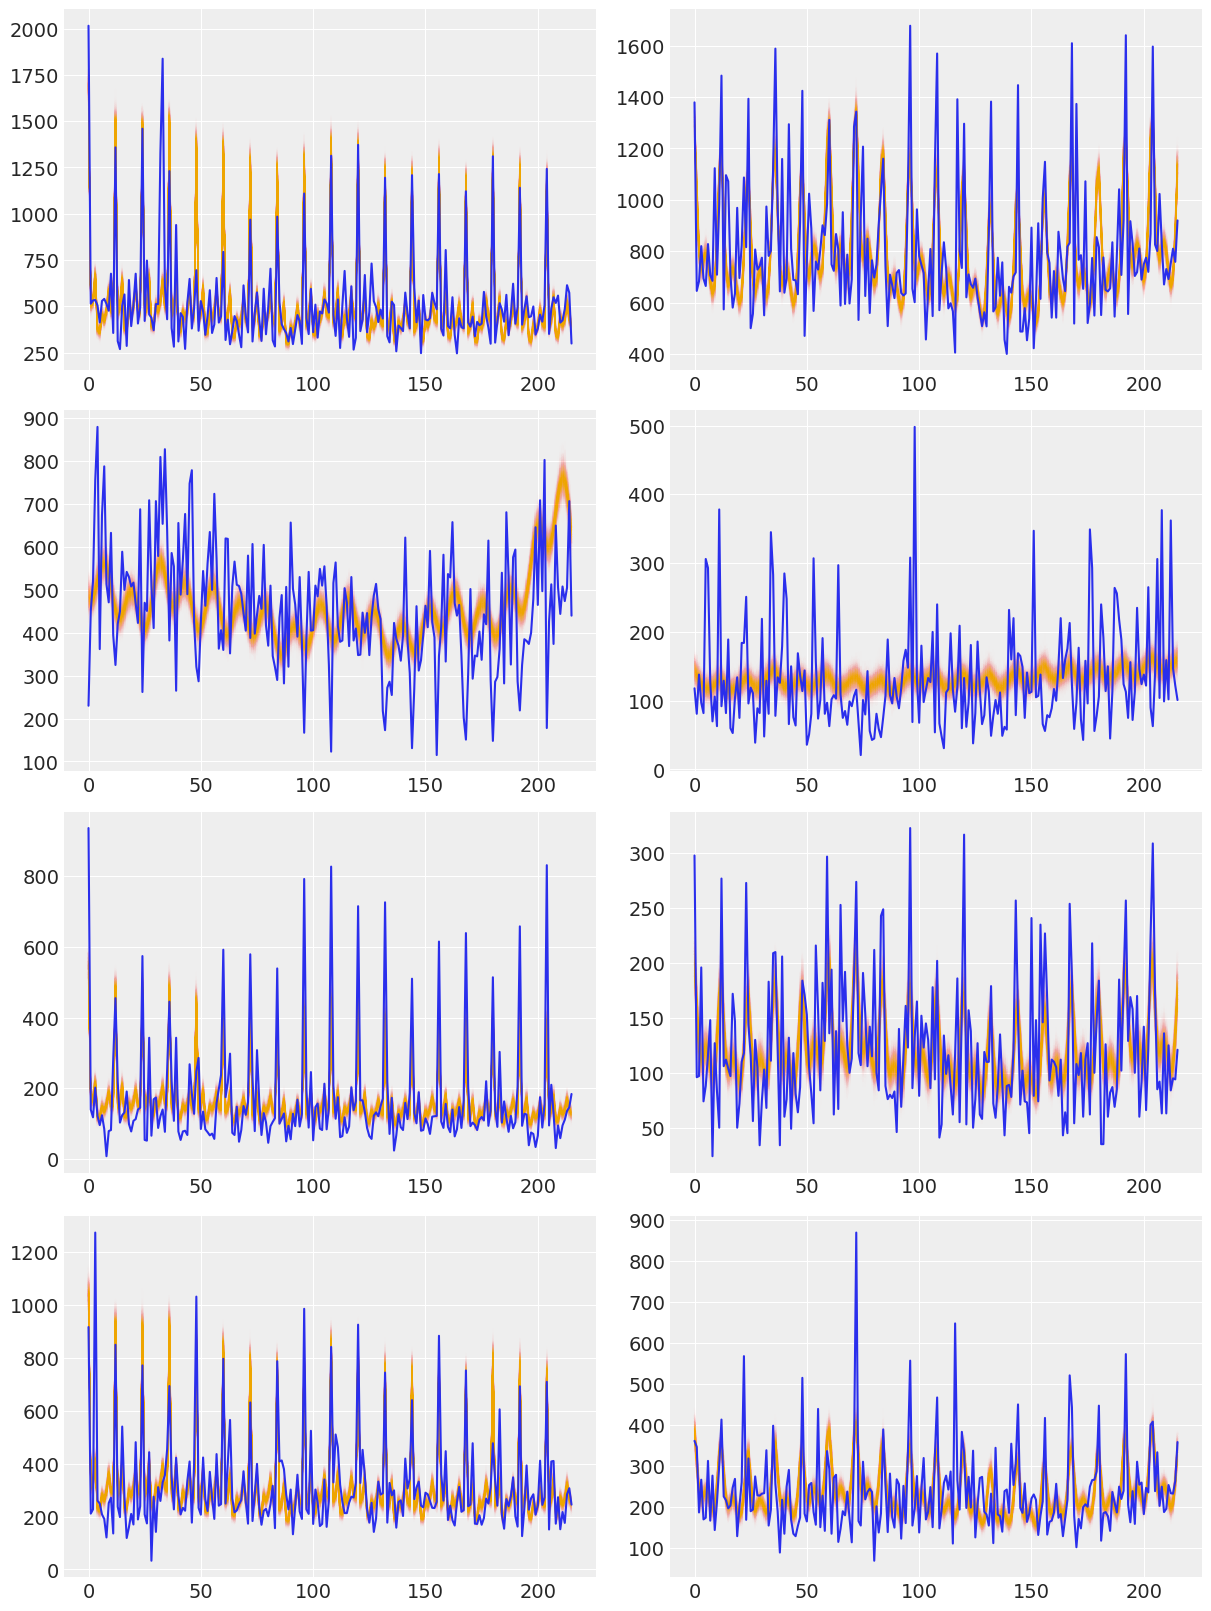

In [9]:
visualize_fit(groups, m.pred_samples_fit, 8)

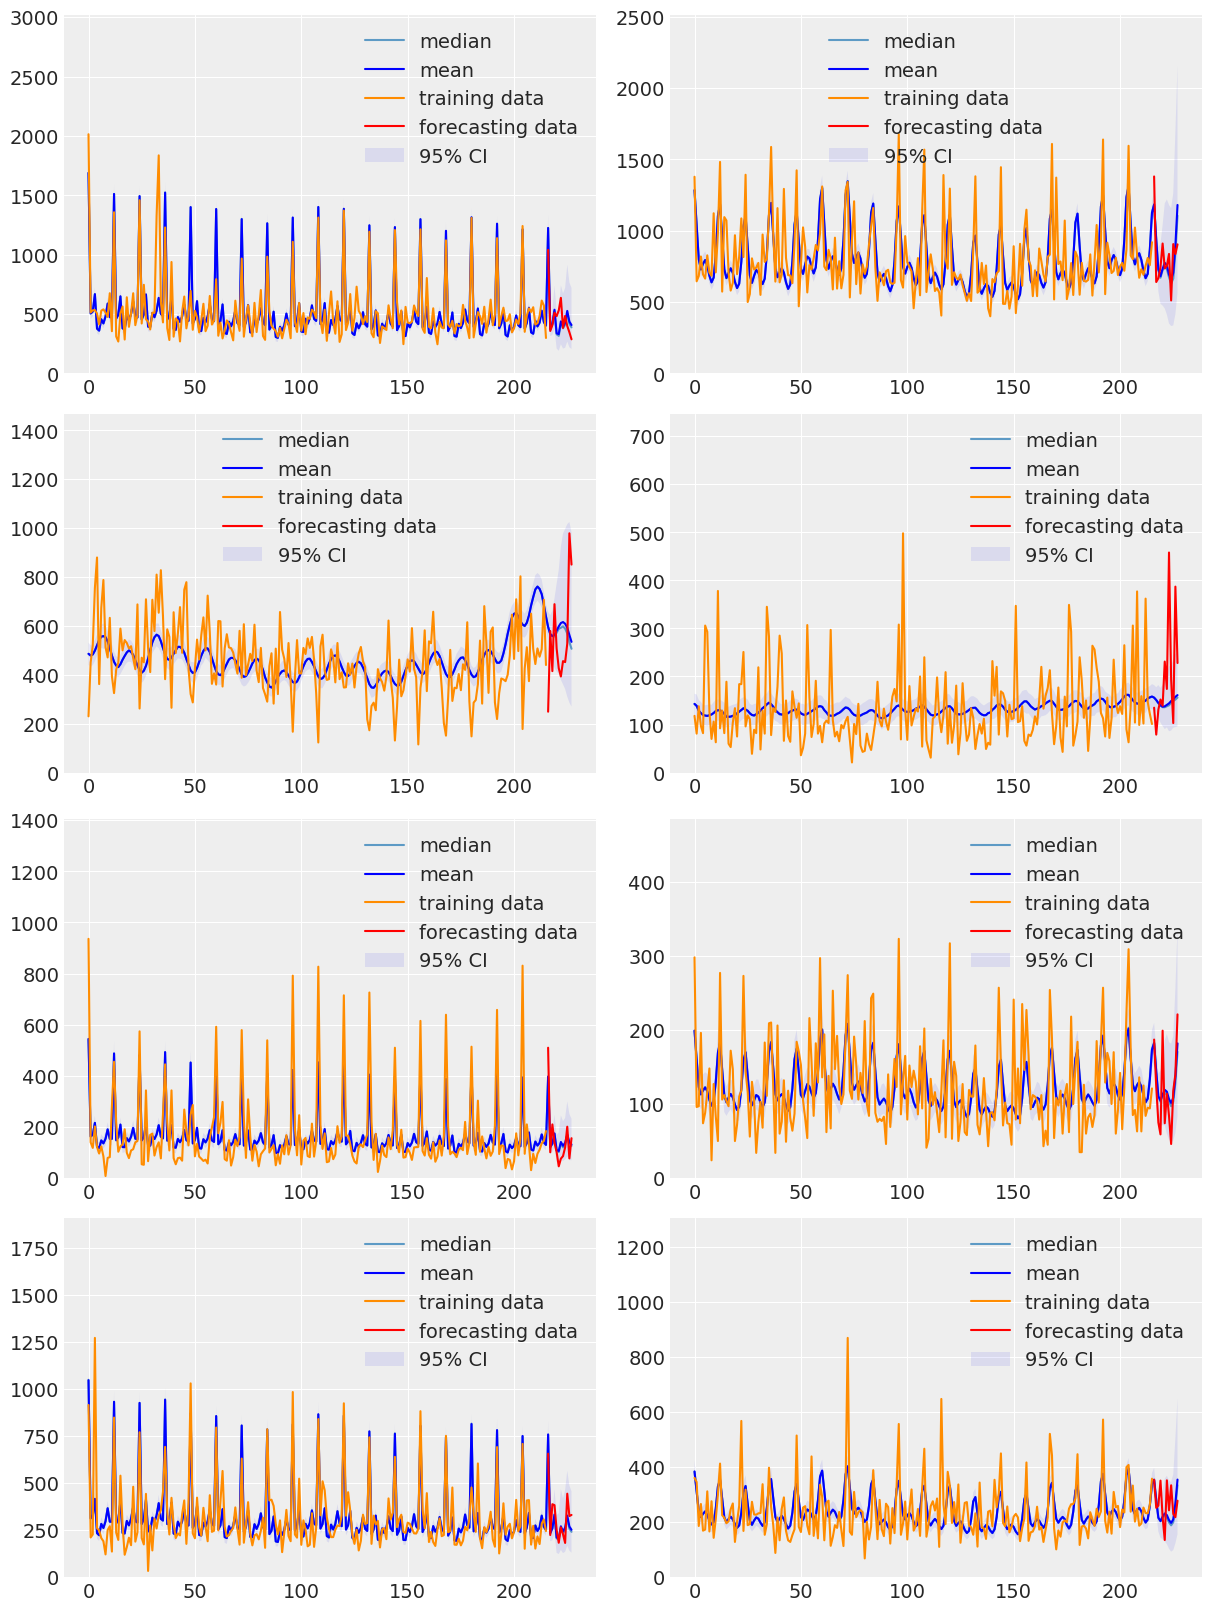

In [10]:
visualize_predict(groups, m.pred_samples_predict, 8)

In [11]:
results = calculate_metrics(m.pred_samples_predict, groups)

In [12]:
metrics_to_table(groups, results)

# Using one more level of the hierarchy

In [13]:
m = HGPforecaster(groups_data=groups, 
                  levels=['state', 'zone', 'purpose']
                 )
m.fit()

Fitting model...



Sampling...


In [14]:
m.predict()

Sampling...


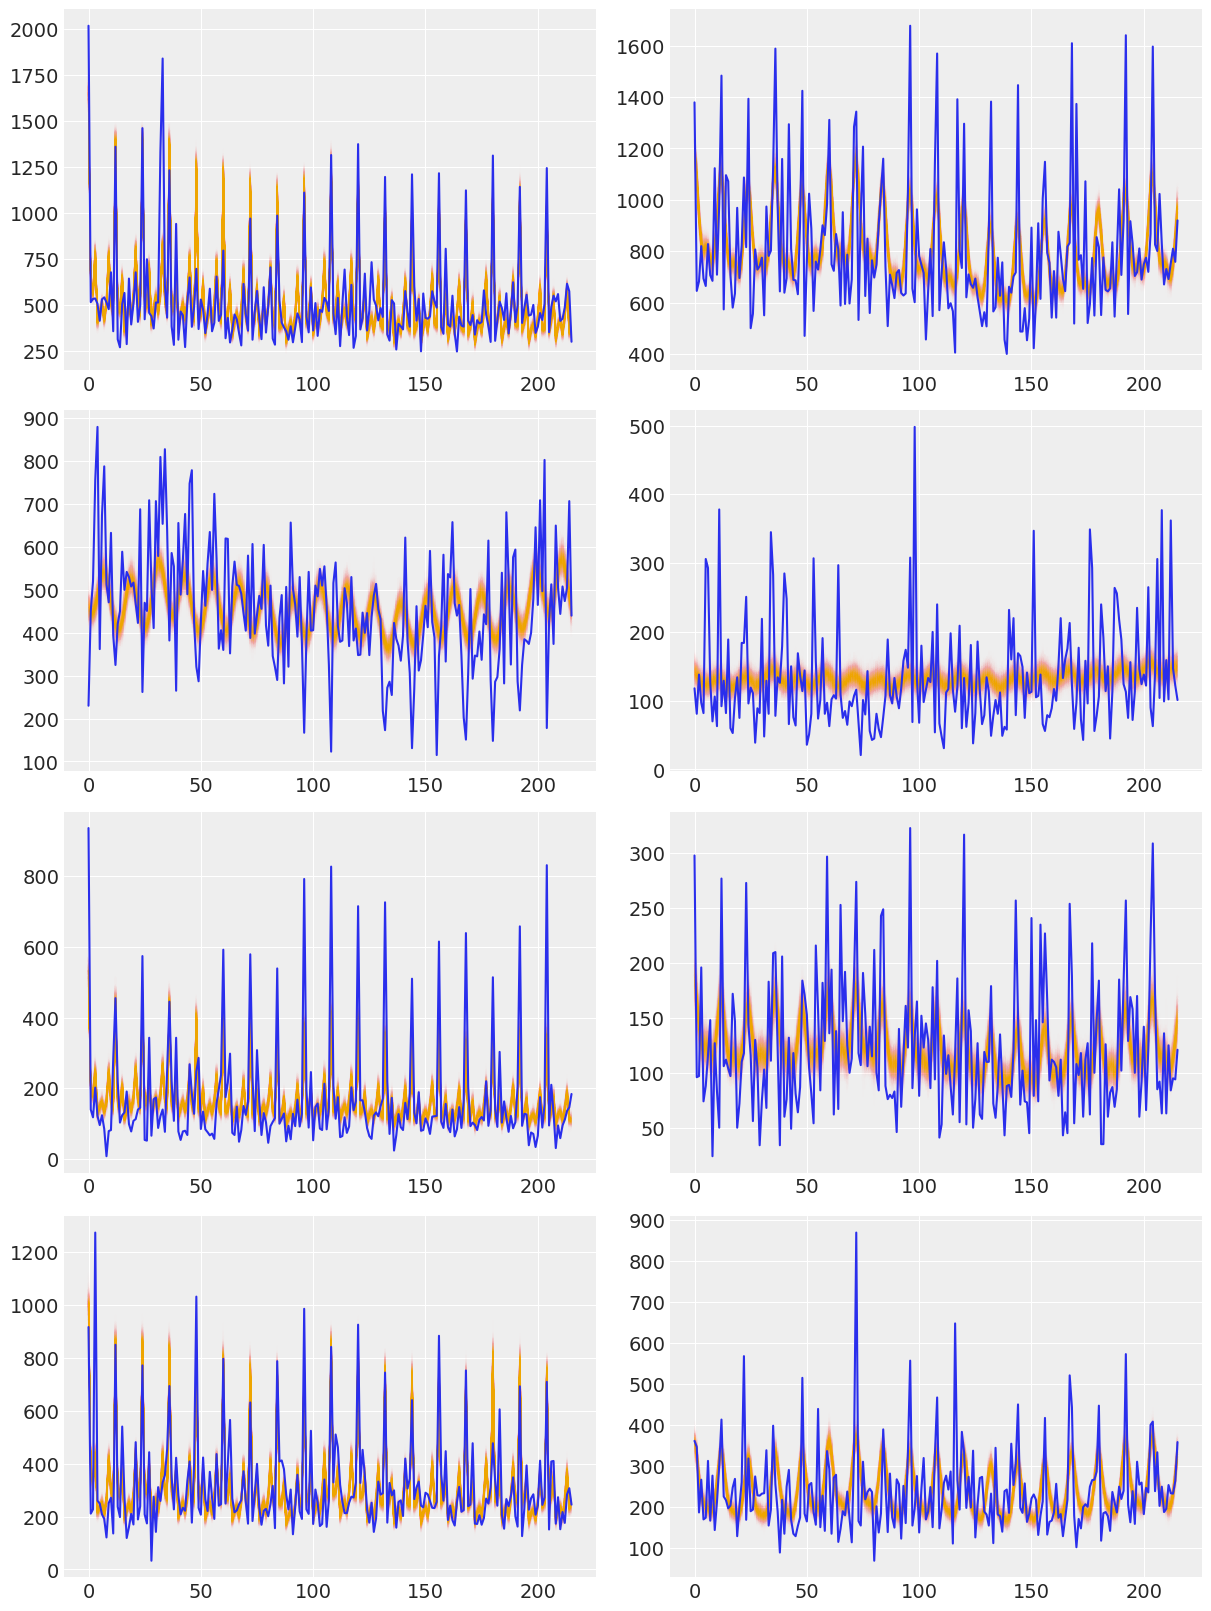

In [15]:
visualize_fit(groups, m.pred_samples_fit, 8)

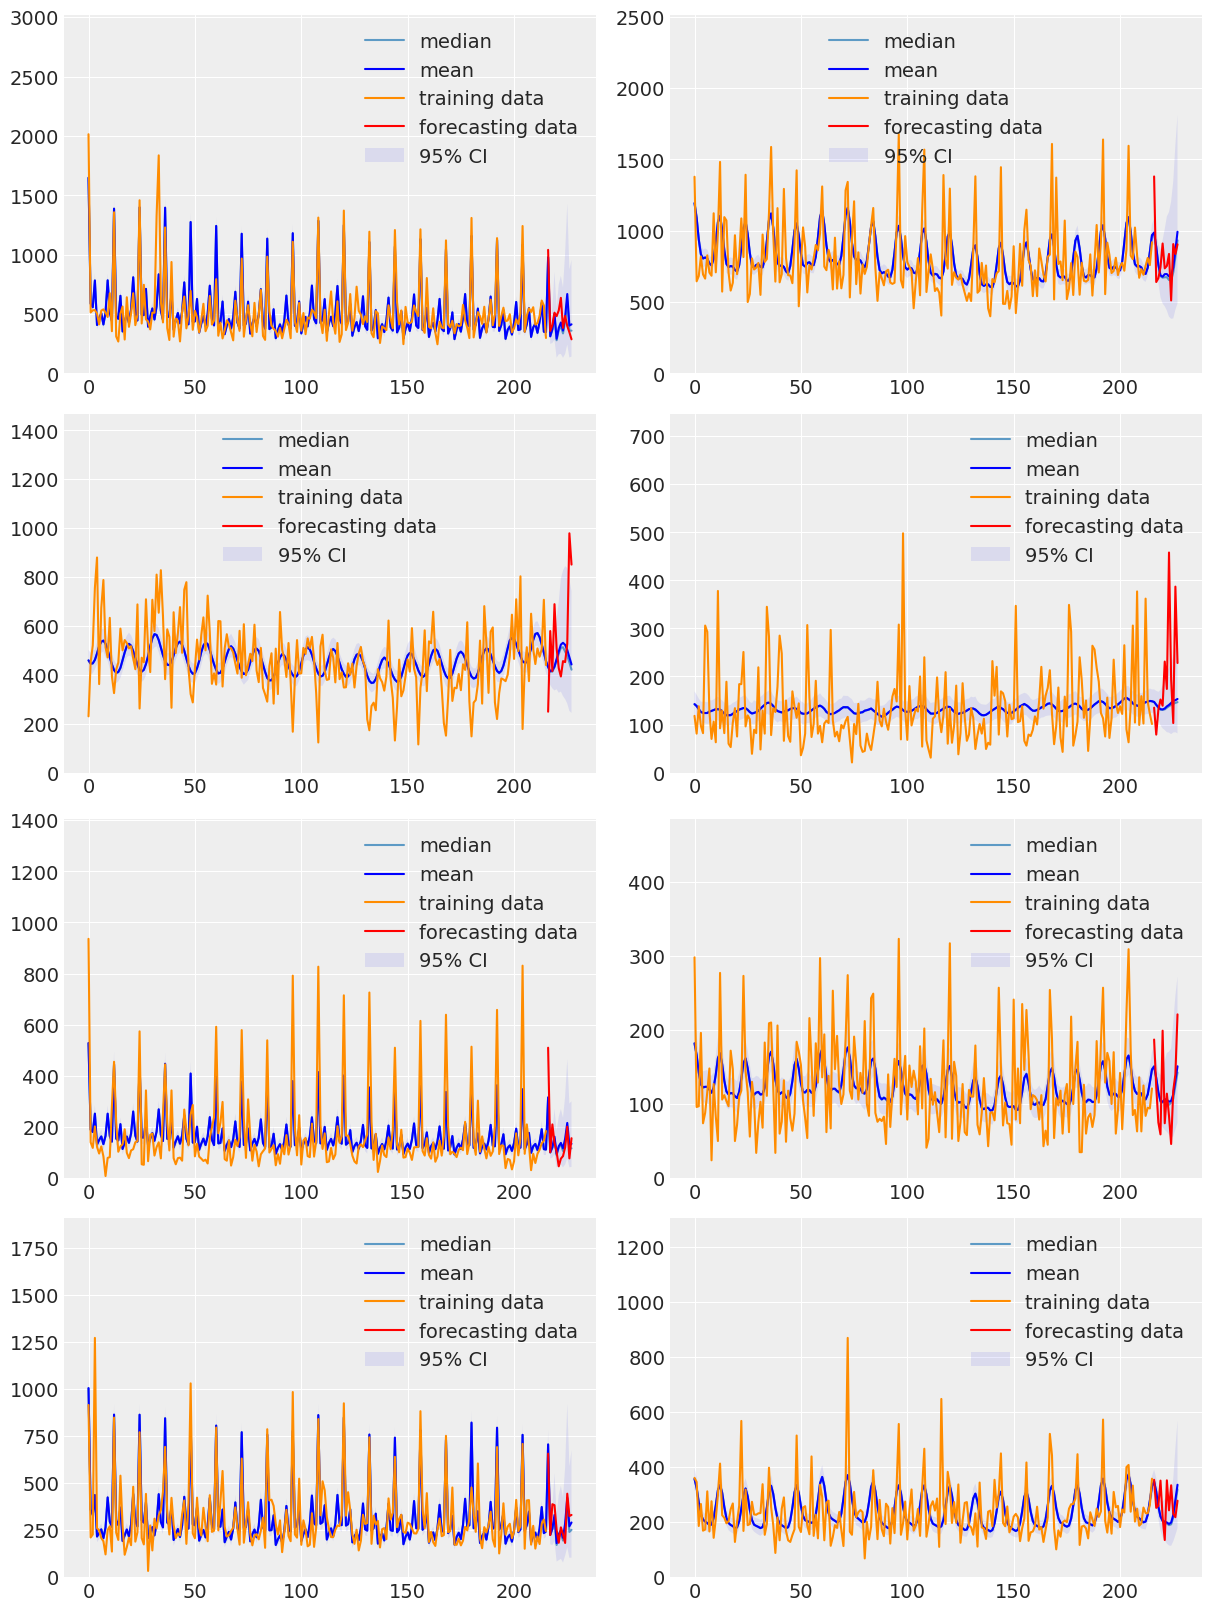

In [16]:
visualize_predict(groups, m.pred_samples_predict, 8)

In [17]:
results = calculate_metrics(m.pred_samples_predict, groups)

In [18]:
metrics_to_table(groups, results)

# Using all levels of the hierarchy

In [19]:
m = HGPforecaster(groups_data=groups
                 )
m.fit()

Fitting model...



Sampling...


In [20]:
m.predict()

Sampling...


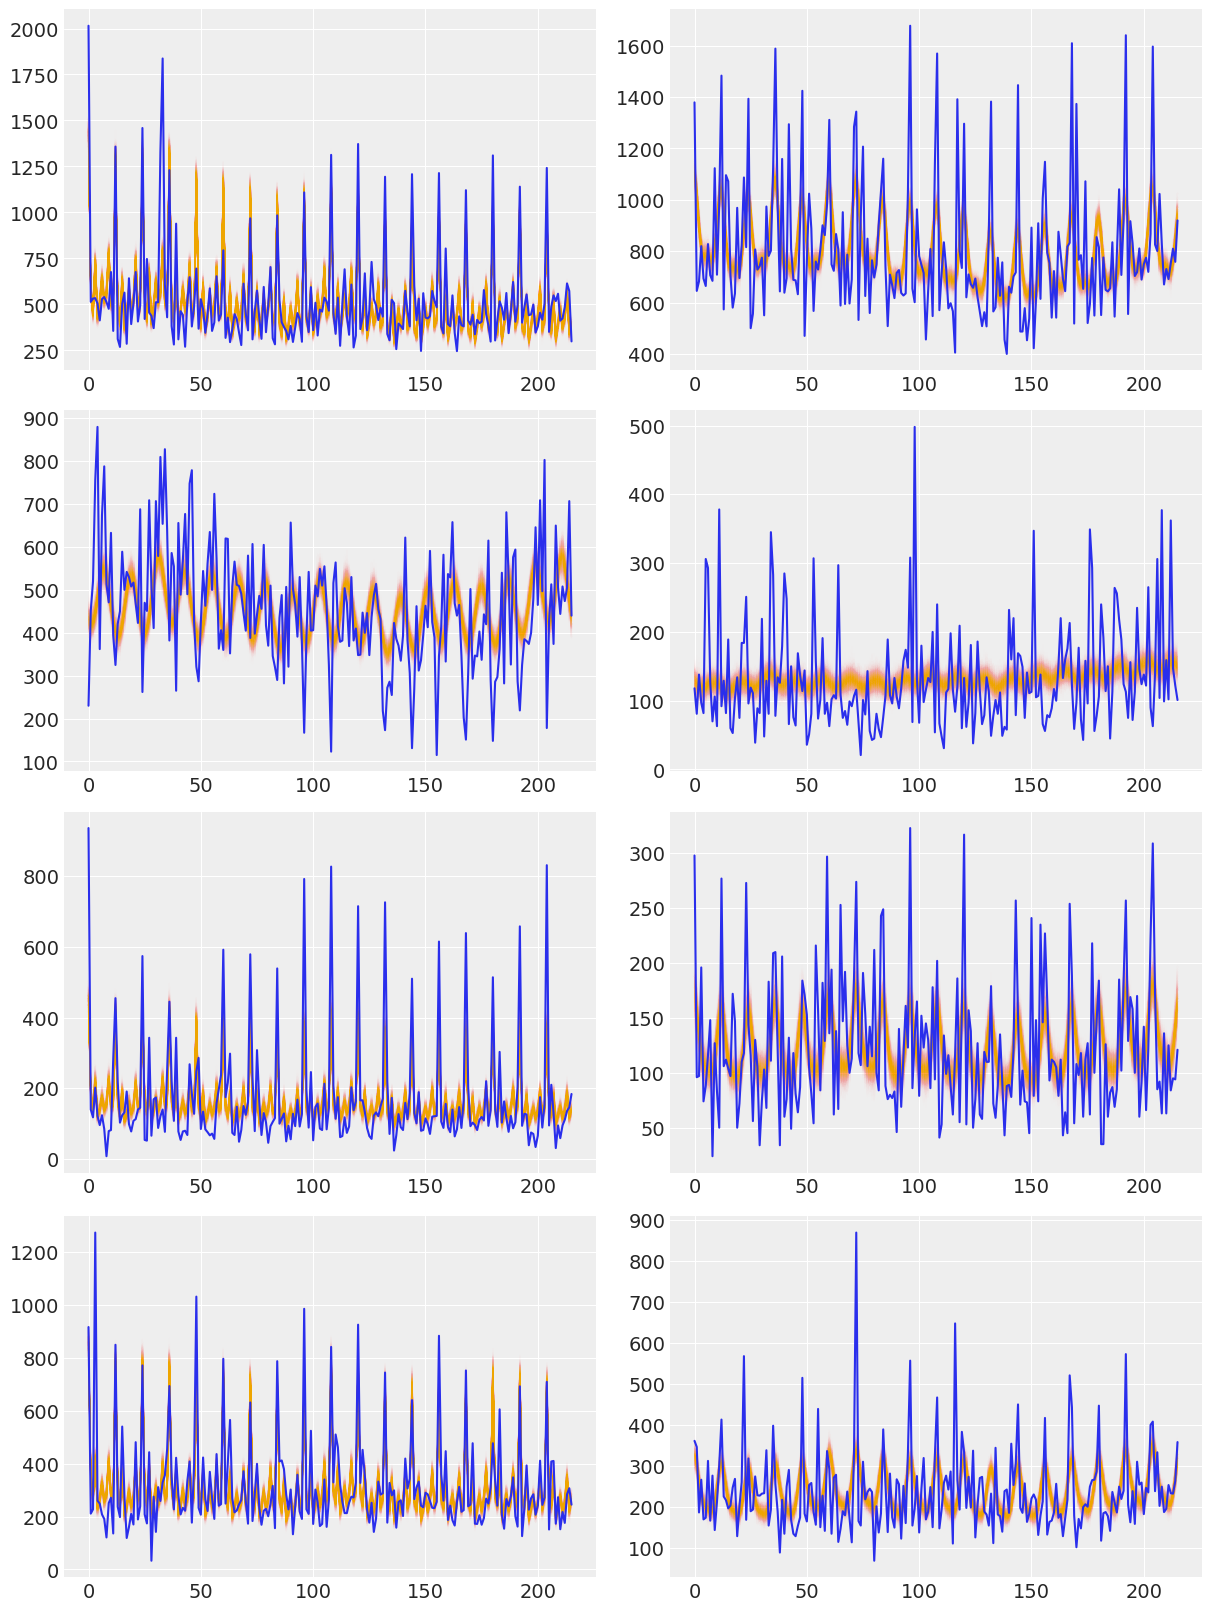

In [21]:
visualize_fit(groups, m.pred_samples_fit, 8)

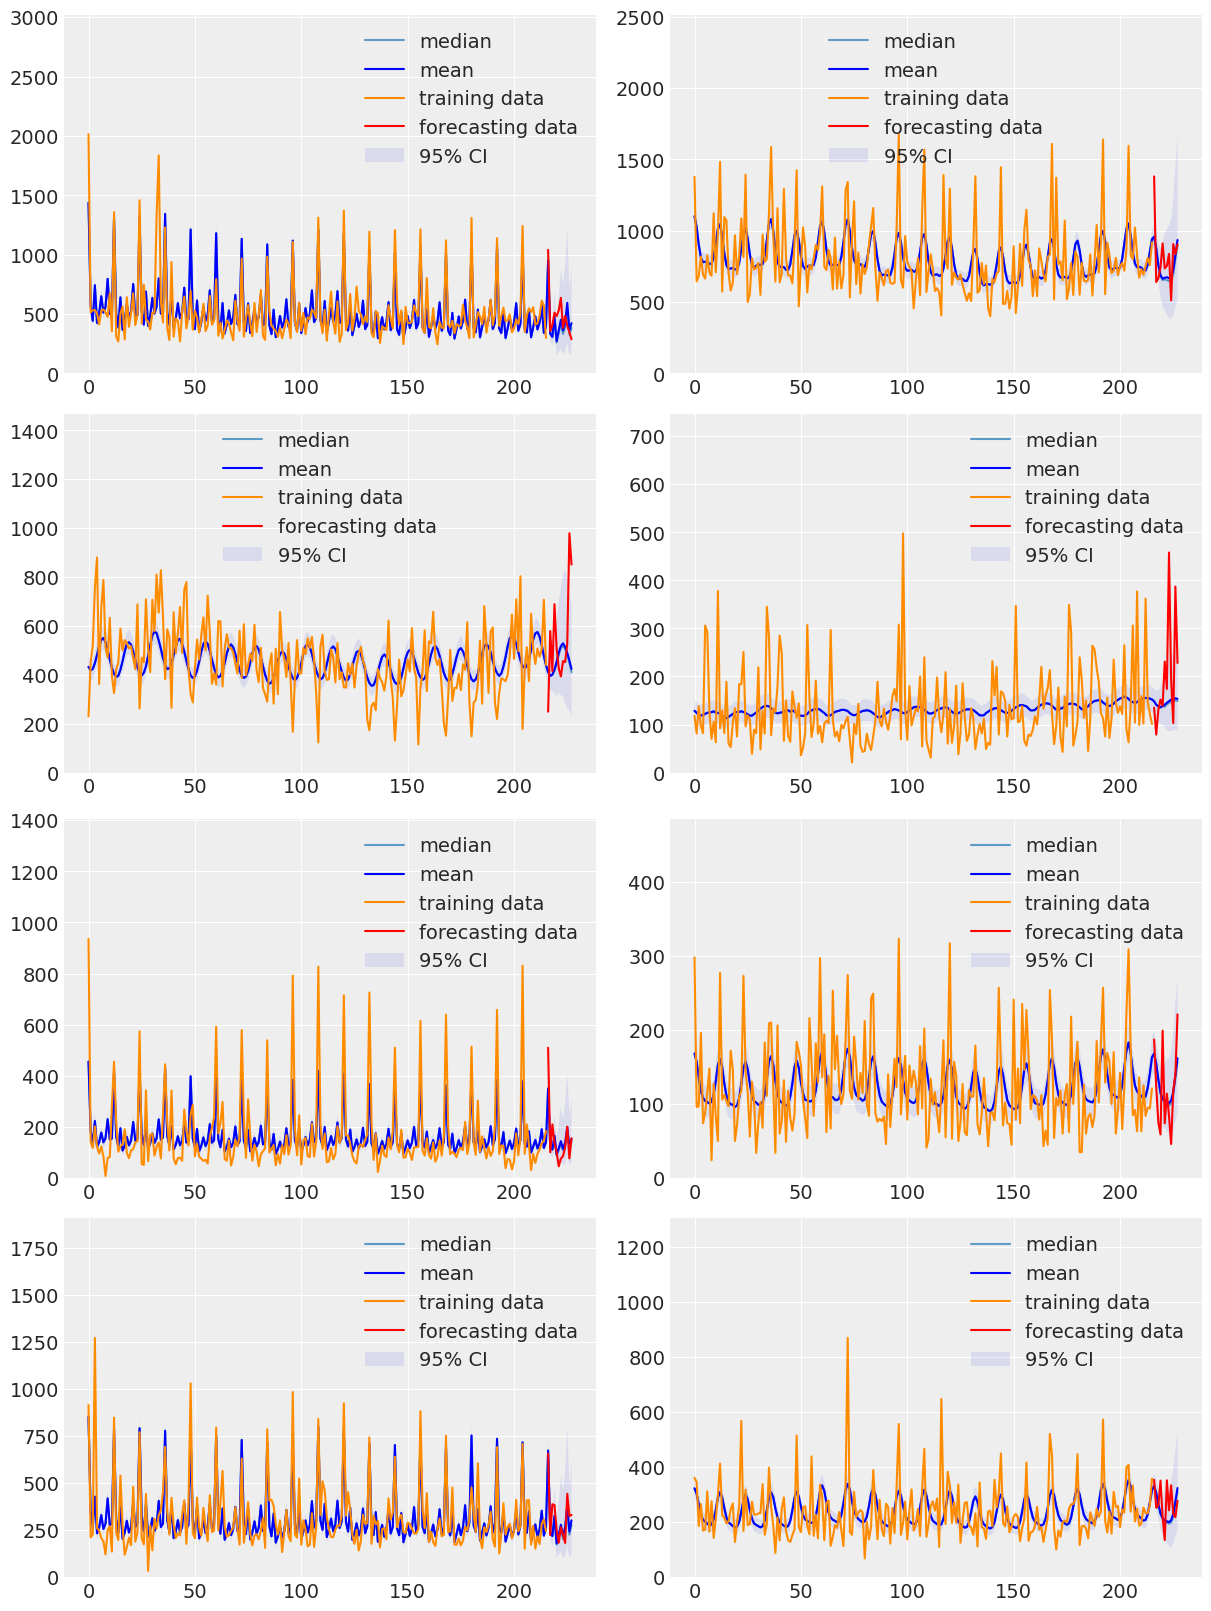

In [22]:
visualize_predict(groups, m.pred_samples_predict, 8)

In [23]:
results = calculate_metrics(m.pred_samples_predict, groups)

In [24]:
metrics_to_table(groups, results)